In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

ex48

In [5]:
# data for the first few exercises
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([-0.5,0.5,1.5,2.5])


In [6]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x): # We implement the forward pass
        return self.A * x
    
A = 1

model = LinModel(A=A)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


In [7]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 2.25
Step 500, Loss: 0.3750005066394806
Step 1000, Loss: 0.3749999701976776
Step 1500, Loss: 0.3749999701976776
Step 2000, Loss: 0.3749999701976776
Step 2500, Loss: 0.3749999701976776
Step 3000, Loss: 0.3749999701976776
Step 3500, Loss: 0.3749999701976776
Step 4000, Loss: 0.3749999701976776
Step 4500, Loss: 0.3749999701976776
Step 5000, Loss: 0.3749999701976776
Step 5500, Loss: 0.3749999701976776
Step 6000, Loss: 0.3749999701976776
Step 6500, Loss: 0.3749999701976776
Step 7000, Loss: 0.3749999701976776
Step 7500, Loss: 0.3749999701976776
Step 8000, Loss: 0.3749999701976776
Step 8500, Loss: 0.3749999701976776
Step 9000, Loss: 0.3749999701976776
Step 9500, Loss: 0.3749999701976776
A = 0.5000019669532776


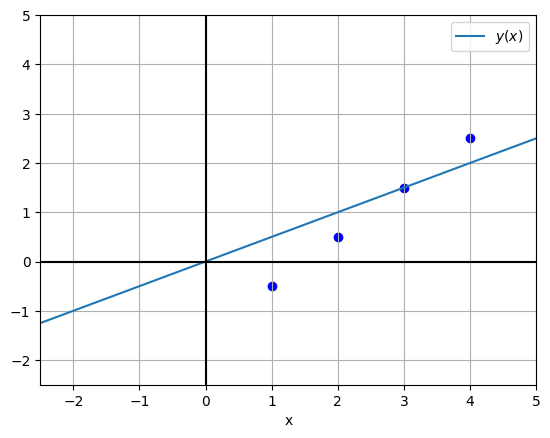

In [8]:
A = 0.5
def lin_func(x,A):
    return A*x

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

In [18]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 5.25
Step 500, Loss: 0.07019560784101486
Step 1000, Loss: 0.05203142762184143
Step 1500, Loss: 0.03856758773326874
Step 2000, Loss: 0.028587706387043
Step 2500, Loss: 0.021190237253904343
Step 3000, Loss: 0.015706943348050117
Step 3500, Loss: 0.01164258923381567
Step 4000, Loss: 0.008629923686385155
Step 4500, Loss: 0.00639681052416563
Step 5000, Loss: 0.0047415741719305515
Step 5500, Loss: 0.0035146214067935944
Step 6000, Loss: 0.0026051716413348913
Step 6500, Loss: 0.00193104799836874
Step 7000, Loss: 0.0014313672436401248
Step 7500, Loss: 0.001060999813489616
Step 8000, Loss: 0.0007864611689001322
Step 8500, Loss: 0.0005829609581269324
Step 9000, Loss: 0.000432122586062178
Step 9500, Loss: 0.00032031763112172484
A = 0.9871755838394165
b = -1.4622949361801147


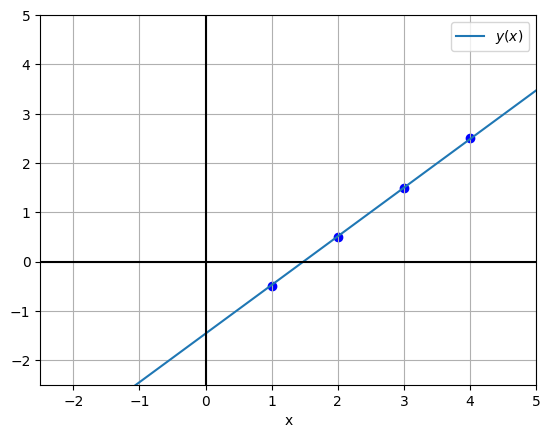

In [20]:
A = 0.9871755838394165
b = -1.4622949361801147
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.4 Non-linear data

In [21]:
# next data which is non-linear
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([1,1,1.5,2.5])

In [22]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 6.625
Step 500, Loss: 0.1784907430410385
Step 1000, Loss: 0.14847642183303833
Step 1500, Loss: 0.126228928565979
Step 2000, Loss: 0.10973823070526123
Step 2500, Loss: 0.09751472622156143
Step 3000, Loss: 0.08845420181751251
Step 3500, Loss: 0.08173821866512299
Step 4000, Loss: 0.07676007598638535
Step 4500, Loss: 0.07307007908821106
Step 5000, Loss: 0.07033493369817734
Step 5500, Loss: 0.0683075562119484
Step 6000, Loss: 0.06680478155612946
Step 6500, Loss: 0.06569083780050278
Step 7000, Loss: 0.06486520916223526
Step 7500, Loss: 0.06425317376852036
Step 8000, Loss: 0.06379950046539307
Step 8500, Loss: 0.06346326321363449
Step 9000, Loss: 0.06321398168802261
Step 9500, Loss: 0.06302926689386368
A = 0.5164846181869507
b = 0.20153392851352692


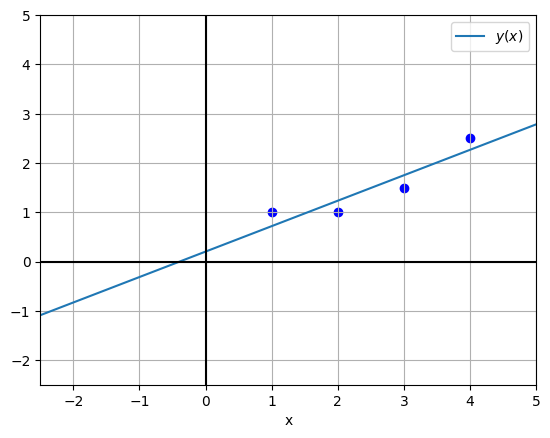

In [24]:
A = model.A.data.item()
b = model.b.data.item()
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot